In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.DataFrame(load_iris()['data'],columns=load_iris()['feature_names'])

In [4]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [5]:
df.shape

(150, 4)

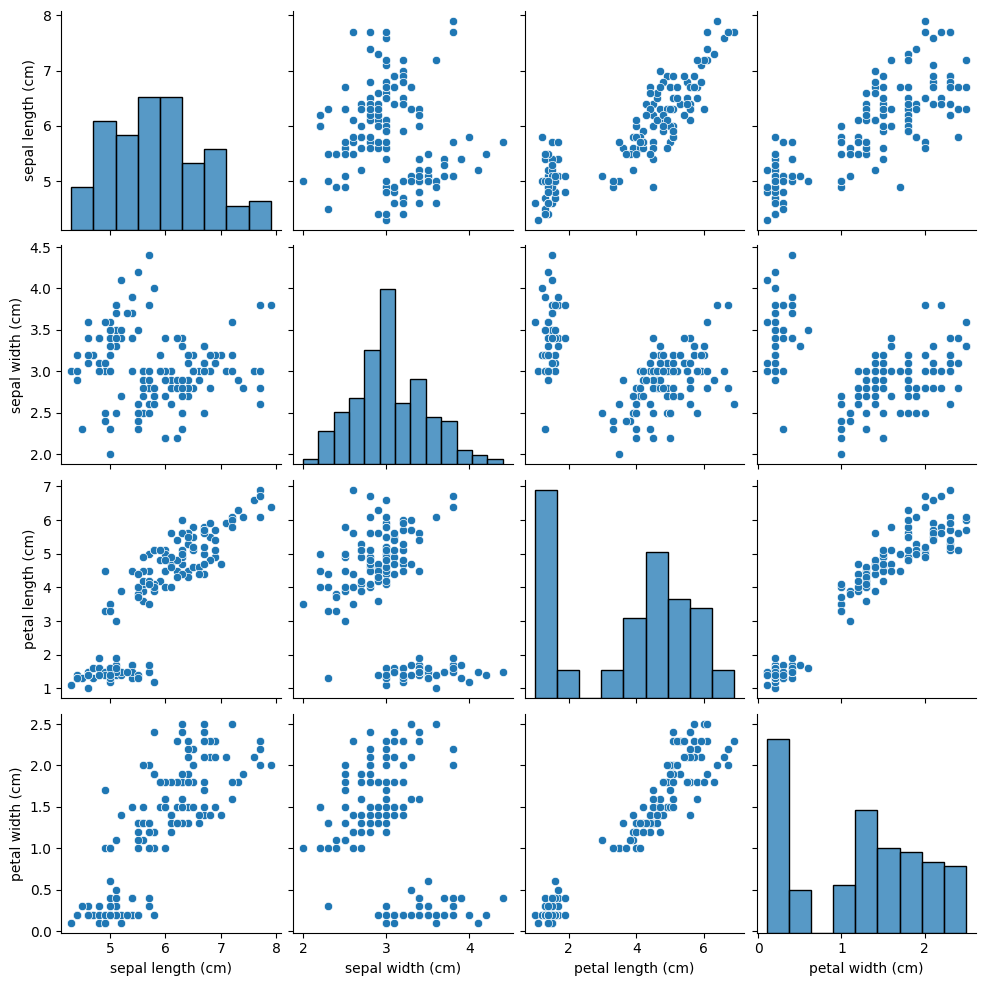

In [6]:
sns.pairplot(data=df)

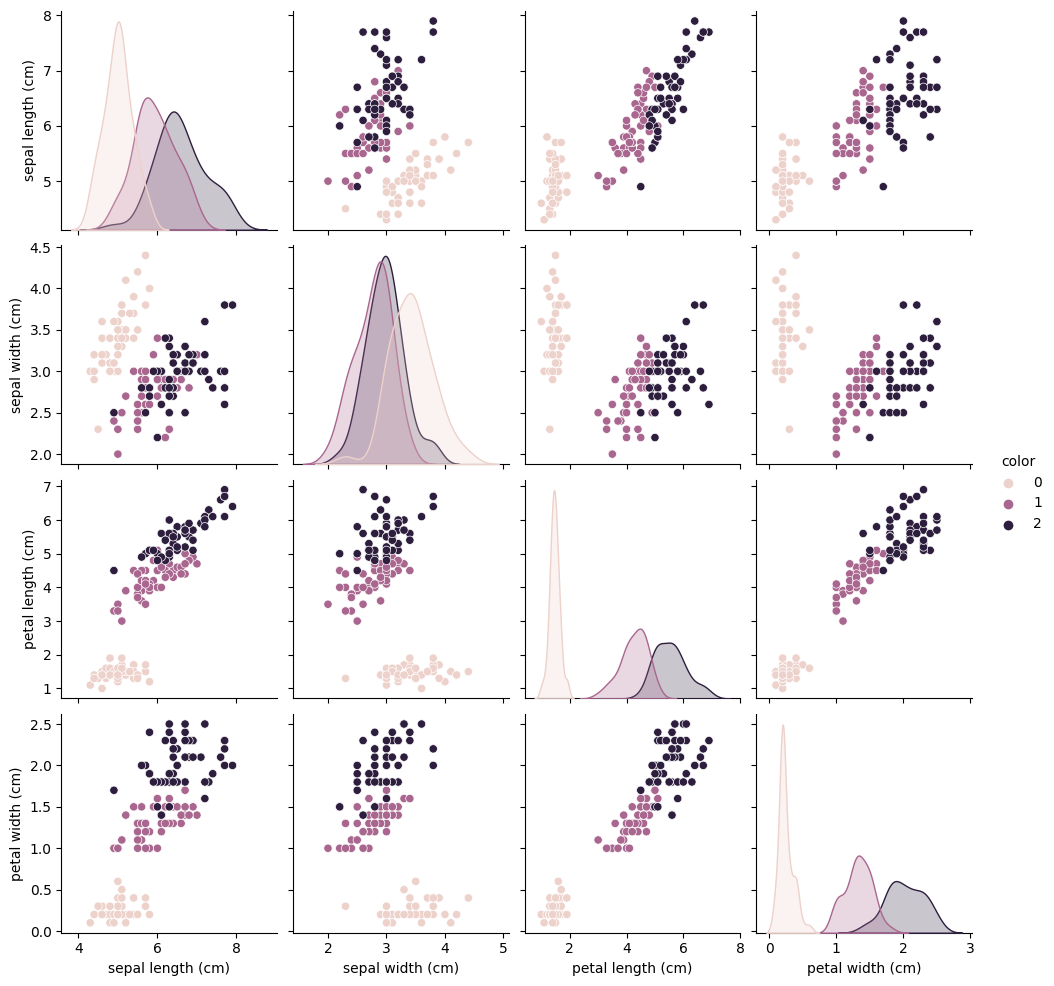

In [9]:
sns.pairplot(data=df.assign(color=load_iris()['target']),hue= 'color')

In [12]:
X=df-df.mean(axis=0)

In [13]:
X.cov()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.685694,-0.042434,1.274315,0.516271
sepal width (cm),-0.042434,0.189979,-0.329656,-0.121639
petal length (cm),1.274315,-0.329656,3.116278,1.295609
petal width (cm),0.516271,-0.121639,1.295609,0.581006


In [18]:
cov = np.dot(X.T,X)*1/(df.shape[0]-1)

In [20]:
eigvalues, eigvectors = np.linalg.eig(cov)

In [21]:
eigvalues/sum(eigvalues)

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [23]:
eigvectors.T

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [-0.65658877, -0.73016143,  0.17337266,  0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [ 0.31548719, -0.3197231 , -0.47983899,  0.75365743]])

In [26]:
loadings=pd.DataFrame(eigvectors.T,index=df.columns,columns=['PC{}'.format(str(x)) for x in range(eigvectors.T.shape[1])])

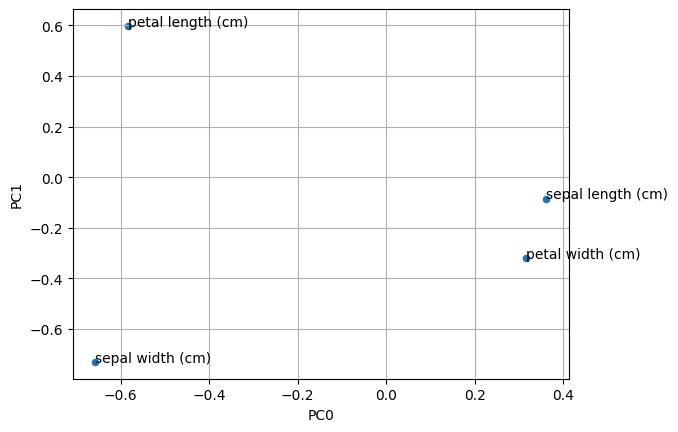

In [28]:
f = sns.scatterplot(data=loadings,x='PC0',y='PC1')
f.grid()
for i in range(loadings.shape[0]):
  f.text(loadings.iloc[i,0],loadings.iloc[i,1], s = loadings.index[i])


In [30]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.743333,0.442667,-2.358,-0.999333
1,-0.943333,-0.057333,-2.358,-0.999333
2,-1.143333,0.142667,-2.458,-0.999333
3,-1.243333,0.042667,-2.258,-0.999333
4,-0.843333,0.542667,-2.358,-0.999333
...,...,...,...,...
145,0.856667,-0.057333,1.442,1.100667
146,0.456667,-0.557333,1.242,0.700667
147,0.656667,-0.057333,1.442,0.800667
148,0.356667,0.342667,1.642,1.100667


In [38]:
scores = pd.DataFrame(X.values.dot(eigvectors[:,:2]))

In [33]:
pca = PCA(n_components= 4)

In [35]:
pd.DataFrame(pca.fit_transform(df))

,0,1,2,3
0,-2.684126,0.319397,-0.027915,-0.002262
1,-2.714142,-0.177001,-0.210464,-0.099027
2,-2.888991,-0.144949,0.017900,-0.019968
3,-2.745343,-0.318299,0.031559,0.075576
4,-2.728717,0.326755,0.090079,0.061259
...,...,...,...,...
145,1.944110,0.187532,0.177825,-0.426196
146,1.527167,-0.375317,-0.121898,-0.254367
147,1.764346,0.078859,0.130482,-0.137001
148,1.900942,0.116628,0.723252,-0.044595


<Axes: xlabel='0', ylabel='1'>

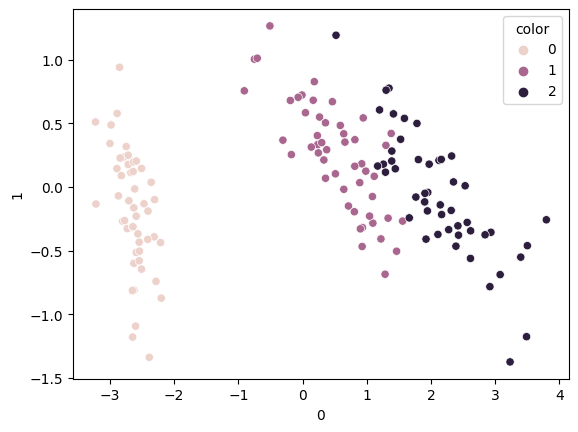

In [39]:
sns.scatterplot(data=scores.assign(color=load_iris()['target']),x=0,y=1,hue= 'color')

Написать varimax

In [40]:
from sklearn.model_selection import train_test_split


In [41]:
!wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'

--2023-08-20 23:54:07--  https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘default of credit card clients.xls’

default of credit c     [   <=>              ]   5.28M  10.1MB/s    in 0.5s    

2023-08-20 23:54:08 (10.1 MB/s) - ‘default of credit card clients.xls’ saved [5539328]



In [42]:
df = pd.read_excel('/content/default of credit card clients.xls',header=1)

In [43]:
X=df.iloc[:,1:-1]
y = df.iloc[:,-1].values

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [45]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [46]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth = 2,random_state=0)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
print(accuracy_score(y_test,rfc.predict(X_test)))

0.8061111111111111


In [50]:
pca = PCA()

X_trainPCA = pca.fit_transform(X_train)
X_testPCA = pca.transform(X_test)

In [51]:
ev = pca.explained_variance_ratio_
ev

array([0.28291179, 0.17828903, 0.07059329, 0.06485326, 0.04454818,
       0.04227015, 0.04000862, 0.03798659, 0.03714189, 0.03225093,
       0.03070625, 0.02996609, 0.02494154, 0.02293955, 0.0172549 ,
       0.01137556, 0.01098053, 0.00823419, 0.00571656, 0.00310531,
       0.0017889 , 0.00110693, 0.00102997])

In [52]:
pca = PCA(n_components=1)
X_trainPCA = pca.fit_transform(X_train)
X_testPCA = pca.transform(X_test)

In [54]:
rfc = RandomForestClassifier(max_depth = 2,random_state=0)
rfc.fit(X_trainPCA,y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [55]:
print(accuracy_score(y_test,rfc.predict(X_testPCA)))

0.7844444444444445


In [56]:
pca = PCA(n_components=5)
X_trainPCA = pca.fit_transform(X_train)
X_testPCA = pca.transform(X_test)
rfc = RandomForestClassifier(max_depth = 2,random_state=0)
rfc.fit(X_trainPCA,y_train)
print(accuracy_score(y_test,rfc.predict(X_testPCA)))

0.8


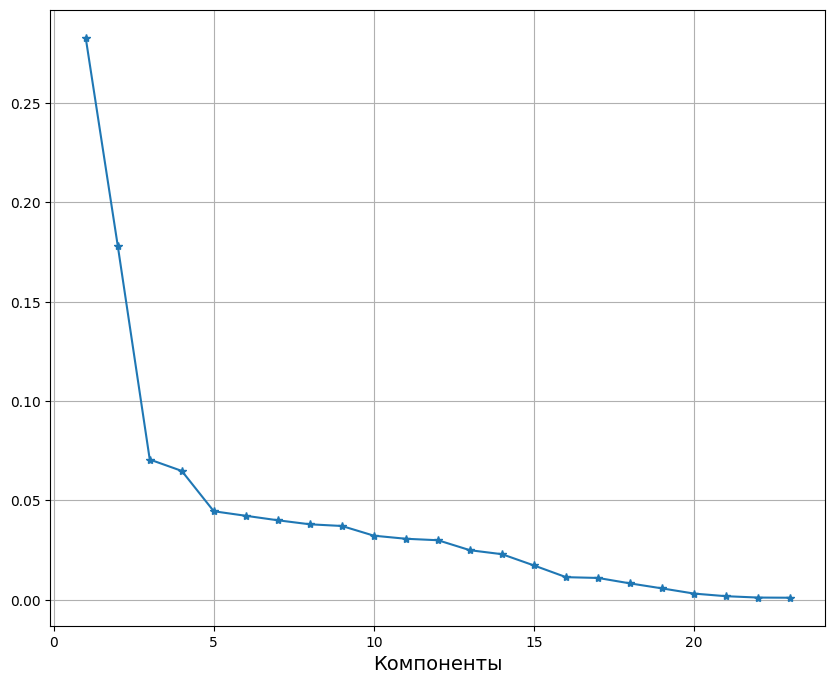

In [60]:
pca = PCA()

X_trainPCA = pca.fit_transform(X_train)
X_testPCA = pca.transform(X_test)

ev = pca.explained_variance_
pv = ev/sum(ev)
plt.figure(figsize=(10,8))
plt.plot(np.arange(1,len(pv)+1),pv,marker='*')
plt.xlabel('Компоненты', size = 14)
plt.grid()

In [72]:
from sklearn.datasets import load_wine

X = load_wine()['data']
y = load_wine()['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [73]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [74]:
from sklearn.ensemble import AdaBoostClassifier



ada = AdaBoostClassifier(learning_rate=0.5)
ada.fit(X_train,y_train)
print(accuracy_score(y_test,ada.predict(X_test)))

0.9444444444444444


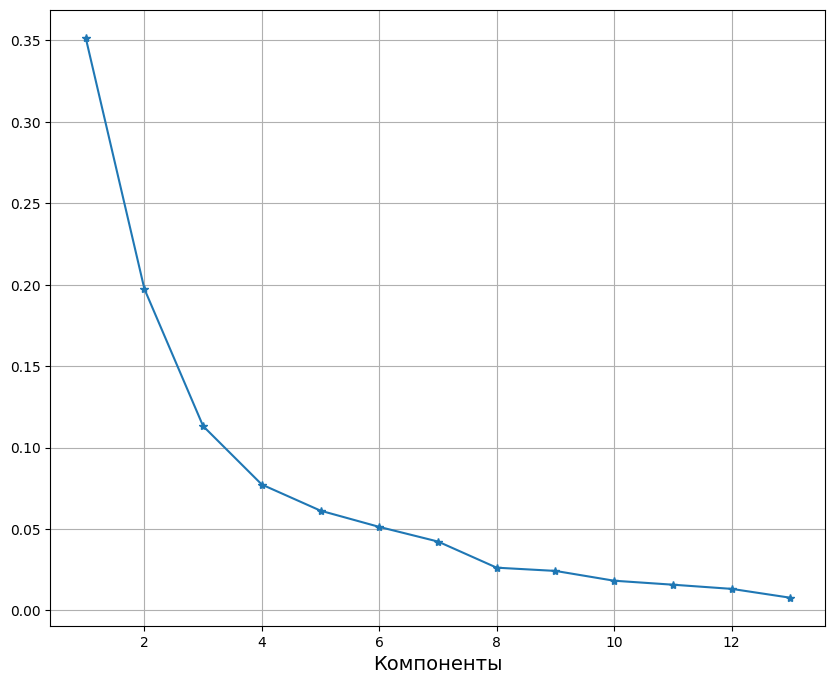

In [75]:
pca = PCA()

X_trainPCA = pca.fit_transform(X_train)
X_testPCA = pca.transform(X_test)
ev = pca.explained_variance_

pv = ev/sum(ev)
plt.figure(figsize=(10,8))
plt.plot(np.arange(1,len(pv)+1),pv,marker='*')
plt.xlabel('Компоненты', size = 14)
plt.grid()

In [76]:
pca = PCA(n_components=5)

X_trainPCA = pca.fit_transform(X_train)
X_testPCA = pca.transform(X_test)

adaB2 = AdaBoostClassifier(learning_rate=0.5)
adaB2.fit(X_trainPCA,y_train)
print('notPCA',accuracy_score(y_test,ada.predict(X_test)),'  PCA',accuracy_score(y_test,adaB2.predict(X_testPCA)))

notPCA 0.9444444444444444   PCA 0.9814814814814815
